# Assignment 1: Car Listings Data

Welcome to your first required assignment. This notebook will guide you through exploring, cleaning, and transforming a real dataset of car listings from Craigslist.  

Please read these instructions carefully before you begin:

- **AI use**: You may use AI to *ask questions* if you are stuck or need clarification. However, do not use AI code-completion or copy/paste code from AI. The purpose of this assignment is for you to gain fluency with Pandas by writing code yourself.  
- **Questions**: Look for cells marked with `Q:`. These contain questions you must answer, either in code or in Markdown.  
- **Markdown**: Use Markdown cells to explain your results, interpret outputs, and format your answers neatly. Clear communication is part of the assignment.  
- **Output**: Ensure your notebook runs top-to-bottom without errors. Remove stray debug code before submitting.  

By the end of this assignment, you should feel more comfortable working with Pandas and preparing real-world data for analysis. 

When you've finished your work on this notebook, restart the kernel, clear the outputs, and run all cells to ensure everything works as expected. Then commit and push your changes to GitHub. Comment out any cells that are printing large outputs or dataframes.

I've placed blank code cells where you need to write code, but don't feel like you have to do all the work for a given part in a single cell. I like to have each step in its own cell, so I can see the output and check my work as I go. You don't need to write a ton for these answers, fyi.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
listings = pd.read_csv("C:\\Users\\Kavya\\OneDrive - University of St. Thomas\\Desktop\\SEISS-631-02\\car_listings.csv")

In [3]:

# Let's handle some column conversions to make it easier to work with this data
listings["time_posted"] = pd.to_datetime(listings["time_posted"], errors="coerce")

# These can have missing values, so cast to pandas' nullable integer type
listings["year"] = pd.to_numeric(listings["year"], errors="coerce").astype("Int64")
listings["odometer"] = pd.to_numeric(listings["odometer"], errors="coerce").astype("Int64")
listings["post_id"] = pd.to_numeric(listings["post_id"], errors="coerce").astype("Int64")
listings["num_images"] = pd.to_numeric(listings["num_images"], errors="coerce").astype("Int64")

listings["price"] = pd.to_numeric(listings["price"], errors="coerce")
listings["latitude"] = pd.to_numeric(listings["latitude"], errors="coerce")
listings["longitude"] = pd.to_numeric(listings["longitude"], errors="coerce")



---

### Part 1: Inspect the Data
- Print dataset shape, data types, summary statistics, and missing values.  


In [4]:
# Use this cell to explore the dataset and answer the questions in the assignment.
print("Shape of the dataset:", listings.shape)
print("Data Types of each column:")
print(listings.dtypes)
print("Numeric summary statistics:", listings.describe())
print("Missing values")
print(listings.isnull())

Shape of the dataset: (266817, 24)
Data Types of each column:
url                               object
location                          object
post_id                            Int64
time_posted          datetime64[ns, UTC]
name                              object
make                              object
model                             object
year                               Int64
odometer                           Int64
title                             object
paint                             object
drive                             object
cylinders                         object
fuel                              object
type                              object
transmission                      object
condition                         object
vin                               object
price                            float64
posting_body_text                 object
title_text                        object
num_images                         Int64
latitude                         flo

In [5]:
print(listings.count()) 

url                  266817
location             266817
post_id              266817
time_posted          263017
name                 262666
make                 257869
model                243707
year                 262668
odometer             262632
title                262670
paint                193660
drive                198520
cylinders            207353
fuel                 262668
type                 218612
transmission         262671
condition            219961
vin                   36977
price                255654
posting_body_text    263017
title_text           263017
num_images           255956
latitude             255742
longitude            255742
dtype: int64


In [6]:
print("Columns in the dataset:", listings.columns)
rows,columns=listings.shape 
print("number of rows are:",rows)
print("number of columns are :", columns)
print("The column with most missing values is:", listings.isnull().sum().idxmax()) #idxmax returns the index with the maximum value
#listings["time_posted"].dtype
listings["time_posted"].dt.day_name()
print(listings[["price","odometer"]].describe())


Columns in the dataset: Index(['url', 'location', 'post_id', 'time_posted', 'name', 'make', 'model',
       'year', 'odometer', 'title', 'paint', 'drive', 'cylinders', 'fuel',
       'type', 'transmission', 'condition', 'vin', 'price',
       'posting_body_text', 'title_text', 'num_images', 'latitude',
       'longitude'],
      dtype='object')
number of rows are: 266817
number of columns are : 24
The column with most missing values is: vin
               price       odometer
count  255654.000000       262632.0
mean     9620.251469   152428.71275
std     10345.793452  165613.707579
min       500.000000            0.0
25%      3671.250000       100000.0
50%      6000.000000       142796.0
75%     11500.000000       185000.0
max    100000.000000     10000000.0


Q: What does `errors="coerce"` do in the functions above?  

A: errors="coerce" is a parameter which can handle the values which cannot be converted into target data type. In the above function, for example if we consider listings["year], if this cannot be converted into numeric type using to_numeric function , our parameter will replace it with NaN instead of raising an error. 

---

Q: How many rows and columns are in this dataset?  

A: number of rows are: 266817 , number of columns are : 24  

---

Q: Which columns have the most missing values?  

A:  vin 

---

Q: What data type is used for the `time_posted` column? Why do you think that matters for analysis?  

A: datetime64[ns, UTC]  which means datetime64 in nanoseconds. It matters for analysis becasue it helps in more accurate filtering, grouping and trend insights. Example, if you want to extract day name then listings["time_posted"].dt.day_name()

---

Q: Looking at the summary statistics (`.describe()`), what are the minimum and maximum values for `price` and `odometer`? Do they seem reasonable?  

A:             price       odometer
min       500.000000            0.0
max    100000.000000     10000000.0

The minimum price of $500 for a very cheap, old and used card seemed reasonable, while the maximum price $100,000 could be valid only for a luxury car which pull the statistics upwards. 
On the other hand, the odometer readings, for minimum of 0 could be either for a brand new car or missing value in the dataset. while, the maximum 10 million miles is not realistic. Cars typically lasts a hundrand thousands miles at most. So, that points to incorrect entries. 


---

### Part 2: Cleaning
- Drop duplicate rows (`post_id` is unique).  
- Standardize string columns to lowercase.  
- Create new variables:
  - `car_age = 2025 - year`  
  - `high_mileage = odometer > 150000`  
  - `price_per_mile = price / odometer`  


In [7]:
listings.drop_duplicates(subset="post_id", keep=False) # drop_duplicates function will remove the duplicate rows based on post_id column

#standardizing the string columns to lower case
string_columns=listings.select_dtypes("object").columns
for columns in string_columns:
    listings[columns]=listings[columns].str.lower() # str.lower converts each column to lower case 

#creating new variables
listings["car_age"]=2025 - listings["year"] #subtract the year of the car from 2025 to get its age\
listings["high_mileage"]=listings["odometer"]> 150000 # creates the boolean value if the column value is greater than 150000 miles 
listings["price_per_mile"]=listings["price"]/ listings["odometer"].replace(0,pd.NA) # divide price by odometer to get cost per mile , if the odometer value is 0 replace it with NaN 


In [8]:
#after creating the new variable finding which make has the highest median value for price_per_mile 
highest_median=listings.groupby("make")["price_per_mile"].median() # grouped by column name 'make'  and calculated the median
top=highest_median.sort_values(ascending=False).head(1) 
print(top)

make
lamborghini    5.00447
Name: price_per_mile, dtype: Float64


In [9]:
#caroline code 
#Create a combined make_model column
listings['make_model'] = listings['make'] + ' ' + listings['model']


In [10]:
#Count listings for each model
model_counts = listings['make_model'].value_counts()
print(model_counts)


make_model
ford f150                 7934
toyota camry              5093
chevrolet silverado       4754
honda accord              4433
nissan r                  4091
                          ... 
toyota corolla hybrid        1
cadillac sixty special       1
rolls-royce cullinan         1
aston martin rapide          1
porsche taycan               1
Name: count, Length: 1077, dtype: int64


In [11]:

#identify make/model with at least 100 observations
at_least_100_obs = model_counts[model_counts >= 100].index
print(at_least_100_obs)


Index(['ford f150', 'toyota camry', 'chevrolet silverado', 'honda accord',
       'nissan r', 'ford escape', 'ram 1500', 'honda civic',
       'chevrolet equinox', 'chevrolet impala',
       ...
       'toyota land cruiser', 'infiniti fx', 'land rover range rover sport',
       'mercedes-benz gle', 'mini countryman', 'audi a8', 'chevrolet caprice',
       'honda insight', 'jaguar type', 'nissan z'],
      dtype='object', name='make_model', length=322)


In [12]:
filtered_listings = listings[listings['make_model'].isin(at_least_100_obs)]
filtered_listings.shape


(227961, 28)

In [13]:
high_mileage_proportion = filtered_listings.groupby('make_model')['high_mileage'].mean().sort_values(ascending=False)
print(high_mileage_proportion.head())

make_model
toyota sequoia             0.815789
ford excursion             0.815498
chevrolet suburban 1500    0.813333
toyota land cruiser        0.796296
nissan xterra              0.788018
Name: high_mileage, dtype: Float64


Q: After standardizing the string columns (`make`, `model`, `fuel`, `drive`, etc.), why is it helpful to convert everything to lowercase?  

A: It is helpful to convert everything to lower case to maintain consistency in the data. if we will not convert them to say lower case then pandas will consider them different values which could lead to incorrect analysis.   

---

Q: You created a new variable `car_age = 2025 - year`. Why might this be helpful?   

A: car_age is helpful because it shows the car's age directly, which makes it easier to compare cars, analyze the trends and predict price of the car.   
Ṭ
---

Q: You created a flag `high_mileage = odometer > 150000`. What make/model with at least 100 observations has the highest proportion of listings in this category?  

A: toyota sequoia -> 0.815789 ha the highet proportion of listing in this category. 

---

Q: You created a new variable `price_per_mile = price / odometer`. Which make has the highest **median** value for this new variable? Do you think this statistic is meaningful? Why or why not?  

A: make
lamborghini    5.00447 ( highest median value )
Name: price_per_mile, dtype: Float64

The price per mile statistic gives a rough idea of how expensive a car is relative to its mileage, but it may not be meaningful on its own because very low mileage cars whose odometer is nearly to 0 will have extreamly high price_per_mile even if the total price is normal. Also, high mileage cars can hvae a very low price_per_mile, making them seem cheaper per mile even if their total price is normal. so, this statistic can be misleading. 


---

### Part 3: Exploration

For this next section, cut down the data to just Ford F-150s. Call this data frame `ford_150s`. Then:
- Fill missing values:
  - Numeric (`odometer`, `year`, `price`) with median.  
  - Categorical (`fuel`, `drive`, `transmission`, `paint`) with the most common value (the "mode").  
- Filter listings priced between $5,000 and $50,000.  
- Compute average price by location.  
- Count monthly listings using `time_posted`.  


In [14]:
# ford_150s=listings[listings["model"] =="ford_150s"] #filter the data to ford f-150 
# print(ford_150s.shape)

ford_150s = listings[listings['model'] == 'f150'].copy()
print(ford_150s.shape)

(7934, 28)


In [15]:
#ford_150s.isnull().sum() 
# filling the missing numeric values with median 
numeric_columns=['odometer',"year","price"]
for column in numeric_columns:
    median_values=ford_150s[column].median() # calculate the median for columns 
    ford_150s[column]=ford_150s[column].fillna(median_values) # fill Nan with median values 


In [16]:
ford_150s.isnull().sum() 

url                     0
location                0
post_id                 0
time_posted             0
name                    4
make                    0
model                   0
year                    0
odometer                0
title                   4
paint                1816
drive                1305
cylinders            1312
fuel                    4
type                  810
transmission            4
condition            1115
vin                  7005
price                   0
posting_body_text       0
title_text              0
num_images            177
latitude              195
longitude             195
car_age                 4
high_mileage            9
price_per_mile        207
make_model              0
dtype: int64

In [17]:

categorical_cols=["fuel","drive","transmission","paint"]
for col in categorical_cols:
    mod_value=ford_150s[col].mode() #.mode returns the most frequent value in the column and [0] gets the first value incase of multiple modes
    ford_150s[col]=ford_150s[col].fillna(mod_value)
print(mod_value)

0    white
Name: paint, dtype: object


In [30]:

# Count the number of missing values in 'odometer'
#missing_odometer = ford_150s["odometer"].isna().sum()
#print(f"Number of missing values in odometer: {missing_odometer}")

# filter the listing priced between $5000 and $50000
filtered_listing=ford_150s[(ford_150s["price"] >= 5000) & (ford_150s["price"] <= 50000)].copy()
print(filtered_listing.shape)




(5445, 29)


In [20]:

# computing the average price by location
avg_price_by_location=ford_150s.groupby("location")["price"].mean().sort_values(ascending=False) #["price"].mean() calculates the average price in each location , groupby groups the listing by location 
print(avg_price_by_location.head(10))
#print(avg_price_by_location.head(1))

location
duluth         13523.847507
desmoines      12529.627692
fargo          12513.882096
kansascity     11736.568433
appleton       11424.737643
omaha          11317.091864
grandrapids    10750.168790
madison        10361.471591
minneapolis    10310.111238
stlouis        10241.924444
Name: price, dtype: float64


In [26]:

#count monthly listing by time posting 
ford_150s["month_posted"]=ford_150s["time_posted"].dt.to_period("M") #dt.to_period('M') fetches the month and year from date time column 
monthly_listing_counts=ford_150s["month_posted"].value_counts().sort_index() # value_counts counts the number of listings in each month and sort_index sorts the index in ascending order
print(monthly_listing_counts)

row_count = ford_150s.shape
print(f"Number of Ford F-150 listings: {row_count}")


month_posted
2023-06     10
2023-07    218
2023-08    265
2023-09    210
2023-10    205
2023-11    216
2023-12    132
2024-01    158
2024-02    235
2024-03    305
2024-04    343
2024-05    387
2024-06    592
2024-07    357
2024-08    432
2024-09    375
2024-10    435
2024-11    339
2024-12    267
2025-01    284
2025-02    261
2025-03    333
2025-04    313
2025-05    351
2025-06    298
2025-07    278
2025-08    312
2025-09     23
Freq: M, Name: count, dtype: int64
Number of Ford F-150 listings: (7934, 29)


C:\Users\Kavya\AppData\Local\Temp\ipykernel_32984\3823497779.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  ford_150s["month_posted"]=ford_150s["time_posted"].dt.to_period("M") #dt.to_period('M') fetches the month and year from date time column


Q: After filtering to Ford F-150s, how many rows remain in your dataset?  

A: Number of Ford F-150 listings: 7934
.shape gives the number of rows in the filtered data frame 

---

Q: When filling missing numeric values with the median, why might that be a better choice than the mean for this dataset?  

A: Using the median to fill the missing numeric values could be a better choice than the mean because  if there are any extreme values like very high price in the dataset then the mean can be pulled up by that outlier, while the median represents the middle value and is less affected. 

---

Q: When filling missing categorical values with the mode, what potential problems could arise?  

A: Filling the emissing categorical values with mode can cause problems because it adds bias towards the one category which is very common and all the missing values gets filled with it. and makes the dataset unbalanced. Thus, making the analysis less accurate.  

---

Q: After filtering to prices between $5,000 and $50,000, what is the new row count?  

A: The new row count is 5445.  

---

Q: Which location has the highest average price for Ford F-150s? Does that result surprise you?  

A: The location with the highest average price for Ford F-150S is duluth 13523.847507 The result is a bit surprising because duluth is not usually considered high demand or luxury vehicle market. The high average could be due to fewer listings in that area, which may skew the result. 

---

Q: Looking at the monthly counts of listings, do you notice any seasonal patterns or anomalies?  

A:  Monthly listings show seasonal patterns which are low at the start (May–June 2023), dips in December, rebounds in Jan–Mar, and peaks in spring/summer (June 2024). Listings stabilize in mid-2024 onward, with September 2025 incomplete.



---
### Part 4: Visualization

We will cover visualization next week, so here's some code that makes plots for you based on the cleaned data you made in the previous section. 

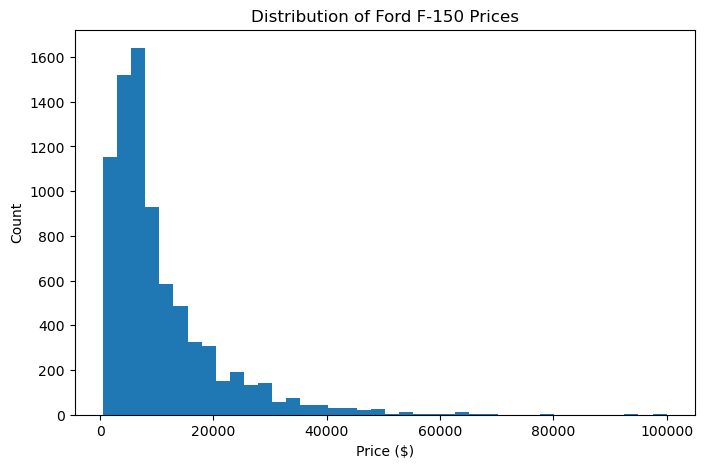

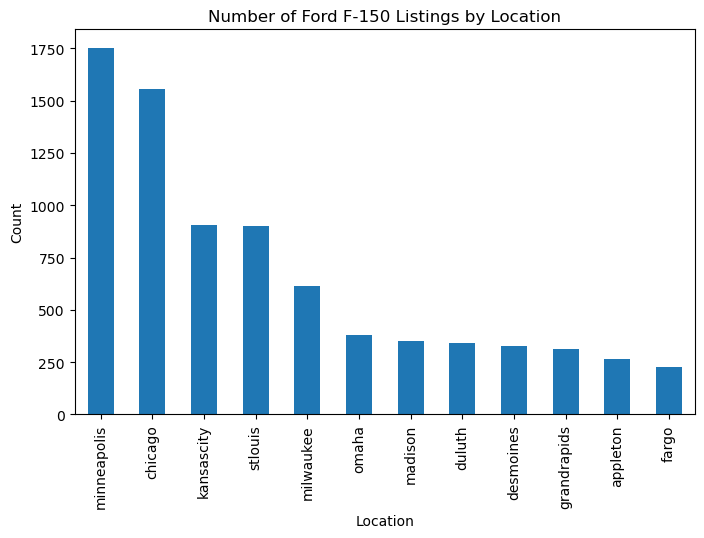

<Figure size 1000x600 with 0 Axes>

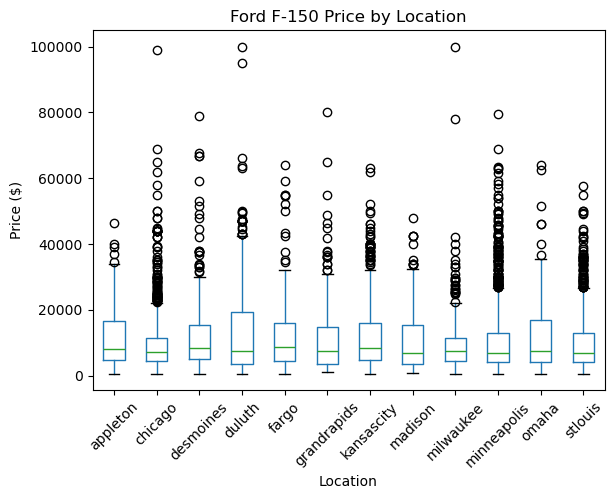

In [22]:

# Histogram of prices
ford_150s["price"].plot.hist(bins=40, figsize=(8,5))
plt.title("Distribution of Ford F-150 Prices")
plt.xlabel("Price ($)")
plt.ylabel("Count")
plt.show()

# Bar chart of listings by location
ford_150s["location"].value_counts().plot.bar(figsize=(8,5))
plt.title("Number of Ford F-150 Listings by Location")
plt.xlabel("Location")
plt.ylabel("Count")
plt.show()

# Boxplot of price by location
plt.figure(figsize=(10,6))
ford_150s.boxplot(column="price", by="location", grid=False, rot=45)
plt.title("Ford F-150 Price by Location")
plt.suptitle("")  # Remove that default subtitle
plt.xlabel("Location")
plt.ylabel("Price ($)")
plt.show()

Q: Looking at the histogram, what do you notice about the distribution of prices? Are there any unusual features?  

A:  The distribution of Ford F-150 prices is heavily right skewed, with most vehicles clustered between $5000 to $20,000. There are a few trucks that cost much more , even up to $100,000 which is an outlier. This skewness suggests that while most vehicles are affordable, a small number of premium vehicles significantly increase the upper range. 

---

Q: Do the counts of listings by location make sense to you? 

A: According to me, the count of listing by location would be total number of vehicles listed in that particular location. There could be various demographic reasons for high or low count in certain locations like population, rural/agricultural communities etc. Here the count for Minneapolis is the highest at 1750 while it is lowest for fargos aroudn 250. 

---

Q: Do the plots help you understand the data differently than the summary statistics alone? Explain briefly.  

A: yes, the plot helps understand the data more deeply than the summary statistics alone because plots reveal the distribution pattern, skewness , clusters and outliers in the data. while the summary statistics like mean,median,mode they give the overall numbers and do not show the shape and size of the data. 

--- 

Q: What do you notice about the distribution of prices by location?
A: The distribution of Ford F-150 prices is similar across all the location, most of the trucks are prices below $20,000. Each location has many outliers with some trucks costing as much as $100,000. Also, the places like Chicago, Minneapolis show a wider spread of prices compared to others. 

---

Q: Which location shows the widest spread of prices? What might that indicate about the market in that city?  

A: The places like Chicago and  Minneapolis show a wider spread of prices compared to others. This suggests that the market there has a bigh mix of both cheaper used trucks and very expensive new ones, likely because its a larger city with more dealership and variety. 

---

Q: Do you see any extreme outliers in the boxplots? How might those affect your analysis?  

A: yes, there are extreme outliers in almst every location ranging between $80,000 to $100,000. They affect the analysis as they pull the mean price upwards, and making the trucks look more expensive than they really are. 


---

### Part 5: Reflection

- Write a short reflection in Markdown:
  - What was most challenging about cleaning this dataset?  
  - Did anything surprise you?  

The most challenging for me was cutting down the data and finding median and mode for specific value. 
The places like Chicago and  Minneapolis showed a wider spread of prices surprised me. 



